### Drug review data analytics
---
In this project, the drug reviews available on UCI publicly available dataset is analyzed. <br>
The dataset is accessible via: <a href="https://www.kaggle.com/jessicali9530/kuc-hackathon-winter-2018"> UCI drug review</a> <br>

This dataset contains around 215,000 patient reviews on drugs. Recorded data spans from the year 2008 until 2017.

The data contains the following features:
<ul>
<li> Drug name</li>
<li> Patient condition </li>
<li> review of the patient</li>
<li> rating </li>
<li> count of usefulness of the drug </li>
</ul>

In the following, I intend to elaborate on `data statistics`, `preprocessing`, `data cleaning`, and finally train a `machine learning` model to estimate the rating of the patient based on their reviews.

Hence the following topics are covered:
- Processing the data using `pandas`
- Data distribution and visualization using `seaborn`
- Word frequency to analyze the most common health condition among patients with `wordcloud` 
- Natural language processing (NLP) to analyze the reviews from `nltk`
- Apply a machine learning model to the review as the main feature using `Xgboost`

---

In [1]:
# Importing required libraries
#############
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import zipfile
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import re
import os

In [2]:

# The archive zip file downloaded from the description and is extracted to cwd
###########
with zipfile.ZipFile('./archive.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

---
For some reason, the training and test sets are separate. We merge them together and later on we will use `train_test_split` from `sklearn.preprocessing` to split the dataset.

<blockquote>Note that if the machine learning model is based on time-series (i.e. prediction of future patients) using LSTM in deep learning or other time-series based techniques, then leave the training and test datasets and deploy the ML on the training and then evaluate on the test set.</blockquote>

In [3]:
df_test = pd.read_csv('drugsComTest_raw.csv',parse_dates=['date'])
df_train = pd.read_csv('drugsComTrain_raw.csv',parse_dates=['date'])
df = pd.concat([df_train,df_test])                   # Merging the test and train dataset
df_sorted = df.sort_values(by='date')

##### Show the distribution of reviews per year

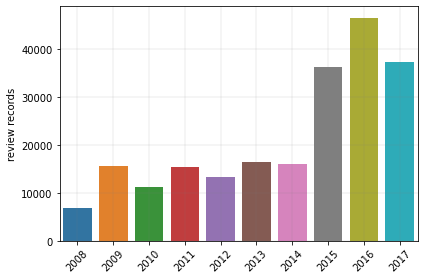

In [4]:
year_counts = df_sorted['date'].dt.year.value_counts()
year_counts.rename('review records',inplace=True)
year_labels = year_counts.index
sns.barplot(x = year_labels, y = year_counts)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(linewidth=0.15,color='grey')

In [5]:
le_condition = LabelEncoder()
df_sorted['condition'] = le_condition.fit_transform(df_sorted['condition'])
top_ten_condition = df_sorted.nlargest(10,'condition')
count_max_condition = df_sorted['condition'].where(df_sorted['condition']==df_sorted['condition'].max()).count()
print(f'The number of conditions with maximum occurrances: {count_max_condition}')

The number of conditions with maximum occurrances: 1194


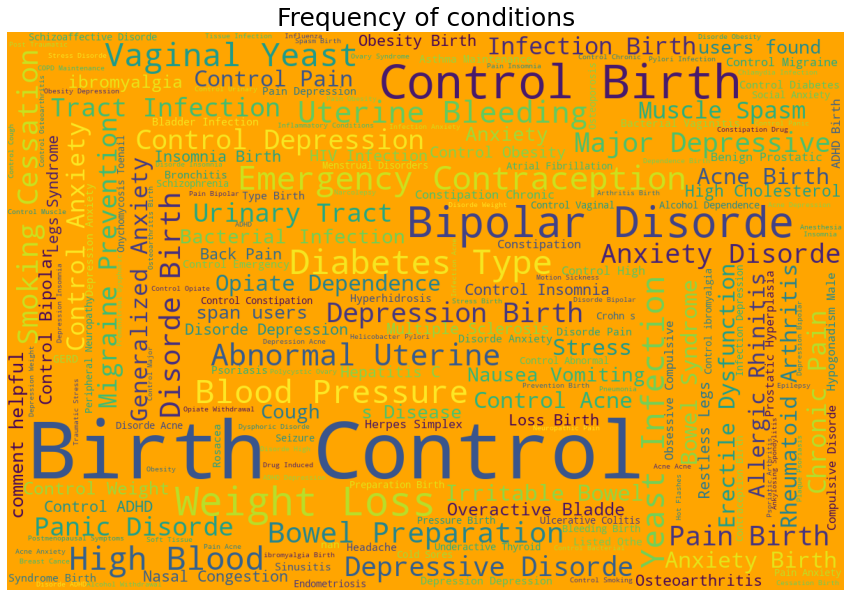

In [6]:
stopwords = set(STOPWORDS)
condition_words = str(list(df['condition']))
filtered_words = re.sub('[^A-Za-z]+', ' ', condition_words)
wordcloud_condition = WordCloud(background_color='orange',
                      stopwords=stopwords,width=1200,
                      height=800).generate(filtered_words)

plt.rcParams['figure.figsize'] = (15,15)
plt.title('Frequency of conditions',fontsize=25)
plt.axis('off')
plt.imshow(wordcloud_condition)
plt.show()

Based on the above finding, the most common health condition among patients is `birth control`. 

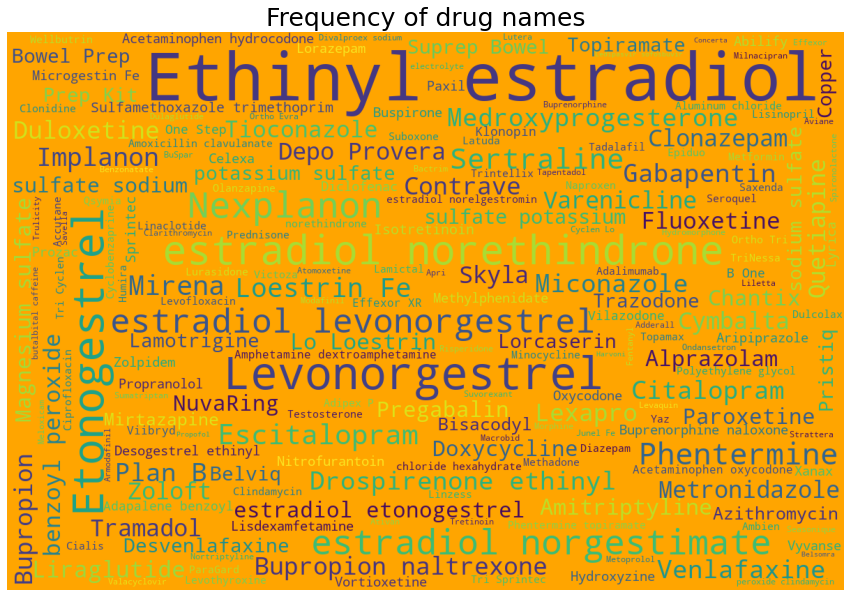

In [7]:
drug_words = str(list(df['drugName']))
filtered_drug_words = re.sub('[^A-Za-z]+', ' ', drug_words)
wordcloud_drug = WordCloud(background_color='orange',
                      stopwords=stopwords,width=1200,
                      height=800).generate(filtered_drug_words)

plt.rcParams['figure.figsize'] = (15,15)
plt.title('Frequency of drug names',fontsize=25)
plt.axis('off')
plt.imshow(wordcloud_drug)
plt.show()

The most widely used drug for treatment is `Ethinyl estradiol`.

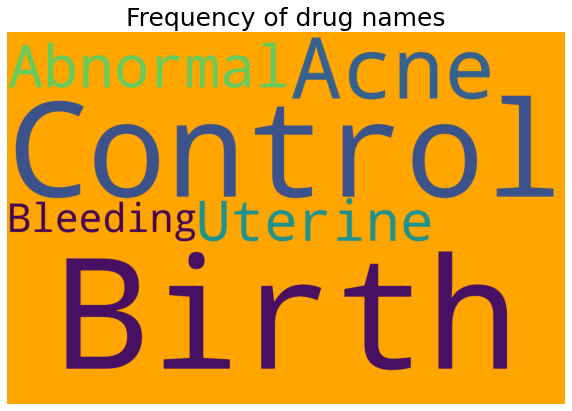

In [8]:
conditions_treated_with_ethinyl = df[df['drugName'].str.contains('ethinyl estradiol',
                                                                 case=False)][['condition']]
condition_for_ethinyl_words = str(conditions_treated_with_ethinyl)
text = condition_for_ethinyl_words
rep = {'columns':'','rows':'','x':'','condition':''}
rep = dict((re.escape(k), v) for k, v in rep.items()) 
pattern = re.compile("|".join(rep.keys()))
text = pattern.sub(lambda m: rep[re.escape(m.group(0))], text)

filtered_condition_for_ethinyl_words = re.sub('[^A-Za-z]+', ' ', text)
wordcloud_condition_ethinyl = WordCloud(background_color='orange',
                      stopwords=stopwords,width=1200,
                      height=800).generate(filtered_condition_for_ethinyl_words)

plt.rcParams['figure.figsize'] = (10,10)
plt.title('Frequency of drug names',fontsize=25)
plt.axis('off')
plt.imshow(wordcloud_condition_ethinyl)
plt.show()

Based on the above observation, `ethynil estradiol` have been used for the following conditions in order of counts:
- `Birth control`
- `Acne`
- `Abnormal bleeding`
- `Uterine`

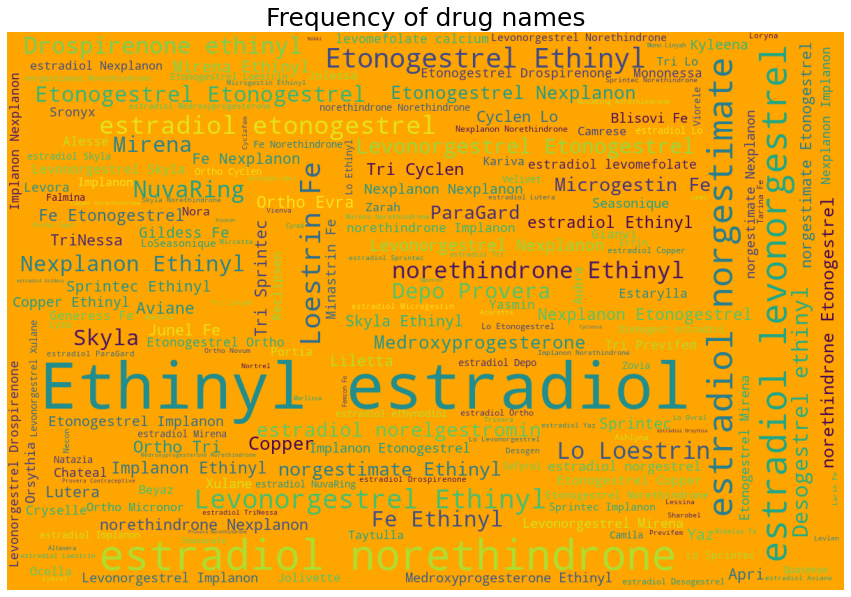

In [9]:
birth_control_drugs = df[df['condition']=='Birth Control'][['drugName','usefulCount']]
birth_drug_words = str(list(birth_control_drugs['drugName']))
filtered_birth_drug_words = re.sub('[^A-Za-z]+', ' ', birth_drug_words)
wordcloud_birth_drug = WordCloud(background_color='orange',
                      stopwords=stopwords,width=1200,
                      height=800).generate(filtered_birth_drug_words)

plt.rcParams['figure.figsize'] = (15,15)
plt.title('Frequency of drug names',fontsize=25)
plt.axis('off')
plt.imshow(wordcloud_birth_drug)
plt.show()

The above graph shows that other drugs have also been used to treat `Birth control`, however, the majority of patients took `Ethynil estradiol`.

/home/rouhani/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'usefulcount')

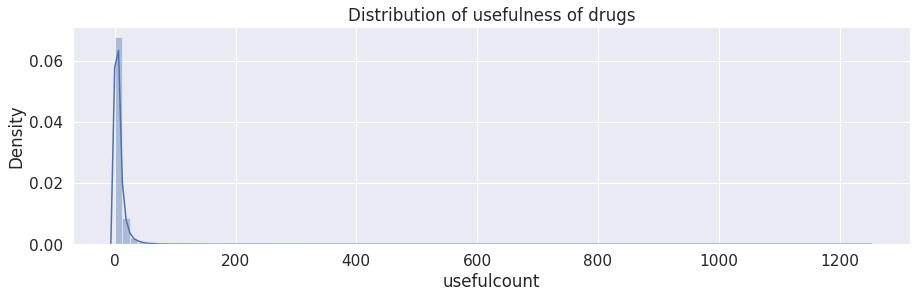

In [10]:
plt.rcParams['figure.figsize'] = [15,4]
sns.set(font_scale = 1.4, style = 'darkgrid')
fig, ax = plt.subplots()
sns_1 = sns.distplot(birth_control_drugs['usefulCount'],bins = 100,ax=ax)
sns_1.set_title('Distribution of usefulness of drugs')
sns_1.set_xlabel("usefulcount")

This plot shows the distribution of `useful counts` for all drugs. There are a number of outliers on the order of `1200`, but most of the drugs taken by patients were counted around less than 100s.

One possible question to ask is what is the total population of patients from which this feature refers to.

In [11]:
birth_control_drugs.where(birth_control_drugs['usefulCount']==birth_control_drugs['usefulCount'].max()).count()
birth_control_drugs[birth_control_drugs['usefulCount']==birth_control_drugs['usefulCount'].max()]['drugName']

4249             Mirena
21708    Levonorgestrel
Name: drugName, dtype: object

Maximum useful drugs for birth control are `Mirena` and `Levonorgestrel`

In [12]:
# df_sorted['rating'][df_sorted['rating'] <5] = 0 
# df_sorted['rating'][df_sorted['rating']>=5] = 1

df_sorted.loc[(df_sorted['rating'] >= 5), 'Review_Sentiment'] = 1
df_sorted.loc[(df_sorted['rating'] < 5), 'Review_Sentiment'] = 0

In [13]:
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [14]:
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

In [18]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df_sorted['review_clean'] = df_sorted['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/rouhani/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
Snow_ball = SnowballStemmer("english")
df_sorted['review_clean'] = review_clean(df_sorted['review'])
df_sorted['review_clean'] = df_sorted['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [20]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [21]:
df_sorted['sentiment'] = sentiment(df_sorted['review'])
df_sorted['sentiment_clean'] = sentiment(df_sorted['review_clean'])

In [22]:
df_sorted['review_clean_ss'] = review_clean(df_sorted['review'])
df_sorted['sentiment_clean_ss'] = sentiment(df_sorted['review_clean_ss'])
data = df_sorted.dropna(how="any", axis=0)

In [23]:
#Word count in each review
df_sorted['count_word']=df_sorted["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count 
df_sorted['count_unique_word']=df_sorted["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
df_sorted['count_letters']=df_sorted["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
df_sorted["count_punctuations"] = df_sorted["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df_sorted["count_words_upper"] = df_sorted["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df_sorted["count_words_title"] = df_sorted["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df_sorted["count_stopwords"] = df_sorted["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
df_sorted["mean_word_len"] = df_sorted["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


[None, None, None, None, None, None, None, None]

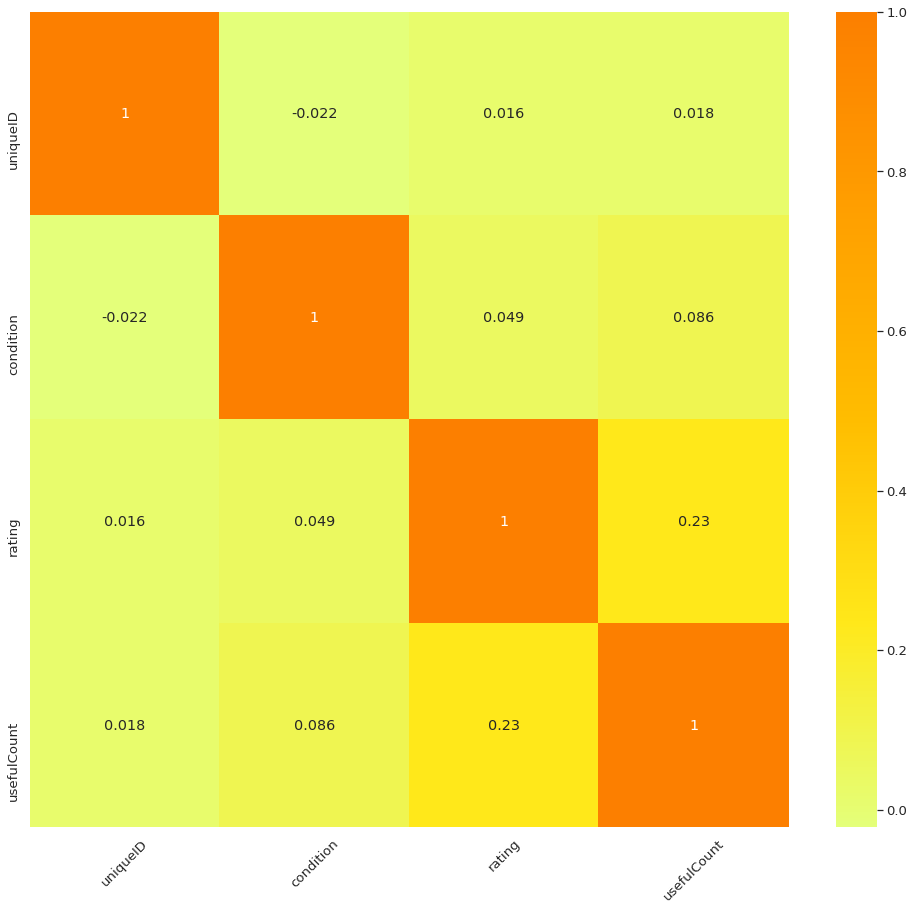

In [30]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'Wistia')
plt.setp(sns_.get_xticklabels(), rotation = 45)

In [31]:
# Label Encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    df_sorted[feature] = label_encoder_feat[feature].fit_transform(df_sorted[feature])

In [32]:
# Importing Libraries for the Machine Learning Model
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [34]:
# Defining Features and splitting the df_sorted as train and test set
# converting the date into datetime format
df_sorted['date'] = pd.to_datetime(df_sorted['date'], errors = 'coerce')

# now extracting year from date
df_sorted['Year'] = df_sorted['date'].dt.year

# extracting the month from the date
df_sorted['month'] = df_sorted['date'].dt.month

# extracting the days from the date
df_sorted['day'] = df_sorted['date'].dt.day
features = df_sorted[['condition', 'usefulCount', 'sentiment', 'day', 'month', 'Year',
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = df_sorted['Review_Sentiment']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (150544, 15)
The Test set size  (64519, 15)


In [35]:
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.9025403369550055
The confusion Matrix is 


array([[11786,  4212],
       [ 2076, 46445]])

In [36]:
if os.path.exists('drugsComTest_raw.csv'):
    os.remove('drugsComTest_raw.csv')

if os.path.exists('drugsComTrain_raw.csv'):
    os.remove('drugsComTrain_raw.csv')
    